# Lektion 10: Fancy Indexing und Masking mit `Numpy`

----

Ziel der Lektion:

* Boolesche Numeric mit `numpy`-Arrays
* Fancy Indexing
* Masking

---

## 1. Boolesche Numeric mit `numpy`-Arrays

In der vorherigen Lektion haben Sie den Umgang mit `numpy`-Arrays kennengelernt. Für den normalen Alltag haben Sie damit alle wichtigen Funktionen gesehen. Es gibt aber noch ein paar weitere mathematischen Anwendungen, die sich mit `numpy`-Arrays ausführen lassen.

Wie bei *normalen* Variablen, lassen sich mit `numpy`-Arrays auch **Vergleiche** machen. Diese werden wie alle anderen mathematischen Operationen elementweise ausgeführt:

In [3]:
import numpy as np

a = np.arange(10)

b = a  > 5

print(b)

print(b.dtype)

[False False False False False False  True  True  True  True]
bool


Sie sehen, dass als Ergebnis wieder ein `numpy`-Array erzeugt wird, diesmal mit dem Datentyp `bool`.

Diese Art von Vergleichen ist ein gutes Werkzeug, jedoch gibt es Situationen wo man nicht eine *elementweise* sondern eine Zusammenfassende Antwort haben möchte. Z.B. kann die Frage $a > 5$ gestellt werden, ob das Array prinzipiell, also __alle__ Elemente größer als $5$ sind. Dazu gibt es die Funktion `np.all(...)`:

In [4]:
import numpy as np

a = np.arange(10)

b = a > 5

print(np.all(b))

False


oder

In [5]:
print(np.all(a >= 0))

True


Man kann sich das so vorstellen, dass `np.all(...)` eine `and`-Verknüpfung aller einzelnen Element-Ergebnisse ist. Daneben gibt es die Funktion `np.any(...)`, die `True` zurückgibt, wenn mind. ein Element selber `True` ist. Dieses entspricht der `or`-Verknüpfung aller einzelnen Element-Ergebnisse.

In [6]:
print(np.any(a > 5))    
print(np.any(a < 0))

True
False


---

## 2. Fancy Indexing

Bei klassischen Indizieren von Elementen (nicht unbeding Slicing) kann man ja immer nur ein einzelnes Element ansprechen. `numpy`-Arrays bieten aber auch die Möglichkeit, mehrere Elemente gleichzeitig anzusprechen, wobei die Indices keinen Regeln unterworfen werden. 

In [9]:
import numpy as np

a = np.arange(0, 100, 10)

indices = [1, 5, -1]
b = a[indices]

print(b)

# or

print(a[[1,2,4]])


[10 50 90]
[10 20 40]


Das sog. `Fancy`-Indexing findet üblicherweise mit einer Liste von einzelnen Indices statt. Die Liste wird dann als *Index* auf das `numpy`-Array angewendet. Zur besseren Übersicht sollten die Indices in einer Variable gespeichert werden, da die doppelten 
`[[` und `]]` verwirrend erscheinen.

Die Indices dürfen bunt durcheinander gemischt werden, auch Doppelungen sind kein Problem. In allen Fällen wird beim `Fancy`-Indexing immer ein neues Array zurückgegeben und kein `View` wie beim normalen Indexing/Slicing:

In [11]:
import numpy as np

a = np.arange(0, 100, 10)

indices = [5, 1, 3, 1,7]
b = a[indices]

print(b)

# change array a
a[1] = -1

print(b)    # b is not a view, but a real copy of the data!

[50 10 30 10 70]
[50 10 30 10 70]


Natürlich geht auch das Zuweisen von Werten mit `Fancy indexing`. Hierbei ist zu beachten, dass die Anzahl der Werte, die zugewiesen werden, mit der Anzahl der Indizes übereinstimmen muss:


In [13]:
import numpy as np  

a =  np.arange(0, 100, 10)

indices = [5, 1, 3, 1, 7]

a[indices] = np.array([-100, -200, -300, -400, -500])

print(a)

[   0 -400   20 -300   40 -100   60 -500   80   90]


An dieser Stelle muss man aufpassen, es wird das Element mit dem Index `1` zweimal überschrieben wird, erst mit `-200` und dann mit `-400`. Sie sehen, dass bei dieser Zuweisung das Index-Array nicht parallel, sondern sequentiell von links nach rechts abgearbeitet wird.

Eine nette Anwendung des `Fancy Indexing`, wenn diese auch sicher nicht als Hauptgrund für die Implementierung gewesen ist, ist die Sortierung eines Arrays. 

In [16]:
import numpy as np

a = np.array([50,10,70,30,90,40,50])

ind = np.argsort(a)

print(ind)

print(a[ind])


[1 3 5 0 6 2 4]
[10 30 40 50 50 70 90]


Die Funktion `np.argsort` erstellt ein Index-Array in der Weise, dass bei Anwendung der Indices auf das Original-Array dieses `sortiert` wird. 

----

## 3. Masking mit `numpy`-Arrays

Eine weitere Möglichkeit, Elemente aus `numpy`-Arrays auszuwählen, ist das sog. Masking. An dieser Stelle kommen die bool-Arrays zum tragen, die in 1. vorgstellt wurden. Das Prinzip des Maskings ist so, dass man für jedes Element ein `True` oder `False` angibt. Jedes Element mit `True` wird beim `Masking` dann ausgeschnitten:

In [18]:
import numpy as np

a = np.arange(0, 100, 10)

ind = np.array([True, False, True, False, False, True, False, True, False, True])

print(a[ind])   

[ 0 20 50 70 90]


Einfacher geht es natürlich mit den Vergleichen:

In [19]:
import numpy as np

a = np.arange(0, 100, 10)

ind = a > 50

print(a[ind])

[60 70 80 90]


In diesem Beispiel werden alle Elemente indiziert, die größer als 50 sind. Es gehen auch komplexere Masken:

In [20]:
ind = (a % 3) == 0

print(a[ind])

[ 0 30 60 90]


Dieses Beispiel selektiert alle Elemente, die durch 3 teilbar sind.  Man kann auch verschiedene Boolesche-Operationen miteinander verknüpfen. Dazu darf man allerdings nicht `and` und `or` nutzen, sondern stattdessen `&` und `|`:

In [21]:
ind1 = (a > 50) & (a < 90)
ind2 = (a < 30) | (a > 70)

print(a[ind1])  
print(a[ind2])  

[60 70 80]
[ 0 10 20 80 90]


Auch wenn es nicht immer notwendig ist, sollten bei den Verknüfpungen einzelne Vergleiche mit Klammern abgegrenzt werden. Das schafft auch ein gutes Mass an Übersicht.

Aufgabe von Masking im Umgang mit wissenschaftlichen Daten ist die Selektion von Messwerten, das aussortieren von **schlechten** und/oder **falschen** Werten.

----

## 4. Anwendungen von Fancy-Indexing und Masking

In der Regel haben wir bei Messwerten meistens Datenspalten, die miteinander verbunden sind, z.B. Messzeit und Messwert oder verschiedene Messwerte, die logisch zusammen gehören, wie Spannung und Strom. 

Wie wendet man das Fancy-Indexing oder Masking auf mehere Datenspalten an?

In [38]:
import numpy as np  

x_values = np.linspace(0, 2*np.pi, 100)
y_values = np.sin(x_values)

Wir erstellen hier eine Reihe von $x$-Werten aus dem Intervall $[0,2\pi]$. Dann wollen wir nur mit $x$-Werten arbeiten, die kleiner als $\pi$ sind. Dafür kann man folgendes machen:

In [39]:
ind = x_values < np.pi

new_x_values = x_values[ind]
new_y_values = y_values[ind]

oder als Plot zur Veranschauung:

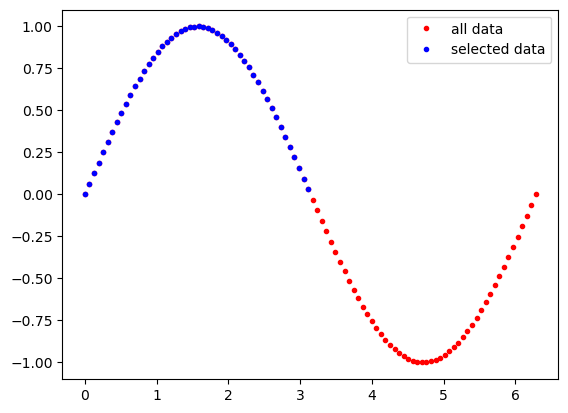

In [43]:
%matplotlib inline  

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x_values, y_values, 'r.', label='all data')

ax.plot(new_x_values, new_y_values, 'b.', label='selected data')

plt.legend()


Wie man sieht, wird die Maske nicht nur auf die $x$-Werte angewendet, sondern parallel auch auf die $y$-Werte. So bleibt der Zusammenhang zwischen den Werten bestehen. 

Das ist auch nützlich, wenn man wie oben gezeigt, Datenwerte sortiert in einer Spalte und die Daten in der anderen Spalte mit umsortiert, wobei die Reihenfolge nicht notwendiger weise sortiert ist, aber zumindest passen dann die $x$-Werte immer noch zu den $y$-Werten.

---

## 5. Fancy Indexing und Masking auf 2d-Arrays